# Plotting the C/N, d15N and d13C signals from sinking and suspended POM in the ETNP

 - Using `python-ctd` and `pandas`

### Some data from McLane pumps (TGT 2012 cruise, 2017 SKQ cruise, 2018 RR cruise, 2019 KM cruise)
 
### Some from Clara's Niskin-filtered POM on GFF (2017 SKQ cruise, 2018 RR cruise, 2019 KM cruise)

### Also bringing in CTD data from 2017, 2018, 2019

- Only using the top collector and +particle chamber if there is no tracer (NO2, NH4, Fe, or S)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 2012 read in McLane stable isotope data and total C & N estimates
### The amount particles assumed 20% of total filter mass, so not very accurate likely

In [2]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2012 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2012-suspended.xlsx", index_col = 'sample id')

etnp_2012.head()

,Station,Year,Depth (m),Pressure [dbar],N (umol),C (umol),d13C,d15N,C:N
sample id,,,,,,,,,
ETNP_033112_Pump 2,P1,2012,125,125,0.145653,1.210774,-24.96,9.80,8.329985
ETNP_033112_Pump 1,P1,2012,150,150,0.136665,1.170149,-24.95,9.64,8.558496
ETNP_040112_Pump 1,P1,2012,45,45,0.390627,2.793572,-23.94,9.43,7.148786
ETNP_040112_Pump 2,P1,2012,25,25,0.561115,3.938702,-25.04,9.38,7.014008
ETNP_040212_Pump 1,P1,2012,1000,1000,0.022450,0.195152,-22.86,11.11,8.717488


In [3]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_2012 = etnp_2012.loc[(etnp_2012['Station'] == 'P2')]
P1_2012 = etnp_2012.loc[(etnp_2012['Station'] == 'P1')]

P2_2012.head()

,Station,Year,Depth (m),Pressure [dbar],N (umol),C (umol),d13C,d15N,C:N
sample id,,,,,,,,,
ETNP_040812_Pump A,P2,2012,350,350,0.040721,0.340577,-24.15,9.41,8.349918
ETNP_040812_Pump B,P2,2012,150,150,0.094328,0.761707,-25.03,9.60,8.067342
ETNP_040912_Pump 1,P2,2012,200,200,0.072118,0.610597,-24.97,9.53,8.455086
ETNP_040912_Pump 2,P2,2012,60,60,0.140621,0.947530,-22.94,7.94,6.733043
ETNP_041012_Pump 1,P2,2012,155,155,0.076510,0.625856,-25.08,9.66,8.175434


In [4]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

sink_2012 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2012-fluxes.xlsx", index_col = 'sample id')

sink_2012.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Org C flux sus POC correction (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),d15N,d13C,Babbin N production rates (nM N/day),N/C
sample id,,,,,,,,,,,,,,,,,,,,
INC C 040112 105m F,P2,2012,105,105,net,cod end,none,9.42,8.39,21.165714,NaN,NaN,NaN,NaN,NaN,NaN,8.90,-25.47,NaN,NaN
INC B 040312 155m F,P2,2012,155,155,net,cod end,none,10.14,6.49,10.521279,NaN,NaN,NaN,NaN,NaN,NaN,8.71,-25.29,NaN,NaN
TRAP N 040212 710m F,P2,2012,710,710,net,cod end,none,37.78,9.81,9.248362,NaN,NaN,NaN,NaN,NaN,NaN,8.42,-24.88,NaN,NaN
TRAP N 041412 750m F,P2,2012,750,750,net,cod end,none,12.78,NaN,14.524095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.16,NaN,NaN


In [5]:
# keep only the rows Station = P2
# keep only rows Station P1

P2_sink2012 = sink_2012.loc[(sink_2012['Station'] == 'P2')]
P1_sink2012 = sink_2012.loc[(sink_2012['Station'] == 'P1')]

P2_sink2012.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Org C flux sus POC correction (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),d15N,d13C,Babbin N production rates (nM N/day),N/C
sample id,,,,,,,,,,,,,,,,,,,,
INC C 040112 105m F,P2,2012,105,105,net,cod end,none,9.42,8.39,21.165714,NaN,NaN,NaN,NaN,NaN,NaN,8.90,-25.47,NaN,NaN
INC B 040312 155m F,P2,2012,155,155,net,cod end,none,10.14,6.49,10.521279,NaN,NaN,NaN,NaN,NaN,NaN,8.71,-25.29,NaN,NaN
TRAP N 040212 710m F,P2,2012,710,710,net,cod end,none,37.78,9.81,9.248362,NaN,NaN,NaN,NaN,NaN,NaN,8.42,-24.88,NaN,NaN
TRAP N 041412 750m F,P2,2012,750,750,net,cod end,none,12.78,NaN,14.524095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.16,NaN,NaN


# 2017 read in flux data, suspended data, CTD data, and nutrient data

In [6]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2017 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2017-fluxes.xlsx", index_col = 'sample id')

etnp_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Org C flux sus POC correction (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),d15N,d13C,Babbin N production rates (nM N/day),N/C
sample id,,,,,,,,,,,,,,,,,,,,
1-1_60m_+p,P1,2017,60,60,cone,particles,none,88.651326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.2,NaN
2-2_50m_+p,P1,2017,50,50,cone,particles,NH4,190.876791,NaN,NaN,NaN,329.466919,329.466919,13.75,2.122054,7.25,NaN,NaN,NaN,NaN
2-2_50m_top,P1,2017,50,50,cone,top,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-3_150m_+p,P1,2017,150,150,net,particles,none,159.375771,6.801011,53.605571,NaN,1380.747967,1380.747967,NaN,NaN,NaN,NaN,NaN,NaN,0.147037
3-3_150m_top,P1,2017,150,150,net,top,none,NaN,6.330467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.157966


In [7]:
# Keep just top chamber samples and non-incubated +particle samples

# keep only the rows Station = P2
# keep only rows Station P1

etnp_2017_tops = etnp_2017.loc[(etnp_2017['Incubation'] == 'none')]

P2_2017 = etnp_2017_tops.loc[(etnp_2017_tops['Station'] == 'P2')]

P1_2017 = etnp_2017_tops.loc[(etnp_2017_tops['Station'] == 'P1')]

P2_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Org C flux sus POC correction (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),d15N,d13C,Babbin N production rates (nM N/day),N/C
sample id,,,,,,,,,,,,,,,,,,,,
1-12_73m_+p,P2,2017,73,73,cone,particles,none,81.787511,NaN,103.064253,97.773979,NaN,NaN,NaN,NaN,NaN,NaN,-22.9725,NaN,NaN
1-12_148m_+p,P2,2017,148,148,cone,particles,none,90.820391,NaN,66.997775,62.585555,NaN,NaN,NaN,NaN,NaN,NaN,-25.9195,NaN,NaN
2-14_100m_top,P2,2017,100,100,cone,top,none,NaN,10.613096,37.576112,34.990792,NaN,NaN,NaN,NaN,NaN,NaN,-26.0099,NaN,0.094223
2-14_150m_top,P2,2017,150,150,net,top,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-15_120m_top,P2,2017,120,120,cone,top,none,NaN,13.454258,136.940182,134.098494,NaN,NaN,NaN,NaN,NaN,NaN,-23.3694,NaN,0.074326


In [8]:
# read in suspended POM stable isos from Clara's Niskin filters (GFF)
# only P2 for 2017 in this dataset

sus_2017 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2017-suspended.xlsx", index_col = 'sample id')

sus_2017.head()

,Station,Year,Depth (m),Pressure [dbar],N (umol),C (umol),d13C,d15N,C:N
sample id,,,,,,,,,
43m_P2_cast31,P2,2017,43,43,0.687789,4.514737,-24.6425,3.7722,6.564129
70m_P2_cast31,P2,2017,70,70,0.249618,1.926542,-25.1372,11.0676,7.717964
80m_P2_cast31,P2,2017,80,80,0.167588,1.245333,-24.6598,9.8853,7.430920
90m_P2_cast31,P2,2017,90,90,0.185993,1.556829,-25.1547,NaN,8.370371
100m_P2_cast31,P2,2017,100,100,0.245225,1.882975,-24.9989,10.3396,7.678561


In [9]:
# keep only the rows Station = P2
# keep only rows Station P1

P2sus_2017 = sus_2017.loc[(sus_2017['Station'] == 'P2')]
P1sus_2017 = sus_2017.loc[(sus_2017['Station'] == 'P1')]

P2sus_2017.head()

,Station,Year,Depth (m),Pressure [dbar],N (umol),C (umol),d13C,d15N,C:N
sample id,,,,,,,,,
43m_P2_cast31,P2,2017,43,43,0.687789,4.514737,-24.6425,3.7722,6.564129
70m_P2_cast31,P2,2017,70,70,0.249618,1.926542,-25.1372,11.0676,7.717964
80m_P2_cast31,P2,2017,80,80,0.167588,1.245333,-24.6598,9.8853,7.430920
90m_P2_cast31,P2,2017,90,90,0.185993,1.556829,-25.1547,NaN,8.370371
100m_P2_cast31,P2,2017,100,100,0.245225,1.882975,-24.9989,10.3396,7.678561


In [10]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [11]:
import ctd


castP2_2017 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-043avg.cnv")
downP2_2017, upP2_2017 = castP2_2017.split()

# delete the scan, nbin, and flag columns

del downP2_2017['scan']
del downP2_2017['nbin']
del downP2_2017['flag']

downP2_2017.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par
Pressure [dbar],,,,,,,,,,,,,,,,
3.0,2.982,16.58962,-106.92288,28.7428,28.7419,28.7421,33.5449,33.5546,1021.0701,21.0573,0.20173,189.660,196.33368,0.1606,96.0634,1.000000e-12
4.0,3.976,16.58962,-106.92289,28.7431,28.7431,28.7421,33.5453,33.5546,1021.0747,21.0575,0.22492,189.627,196.33235,0.1660,95.9354,1.000000e-12
5.0,4.970,16.58961,-106.92288,28.7435,28.7432,28.7424,33.5454,33.5548,1021.0788,21.0574,0.20475,189.639,196.33086,0.1615,96.0412,1.000000e-12
6.0,5.964,16.58962,-106.92288,28.7433,28.7429,28.7419,33.5455,33.5549,1021.0833,21.0576,0.20142,189.704,196.33141,0.1659,95.9365,1.000000e-12
7.0,6.958,16.58962,-106.92288,28.7438,28.7434,28.7421,33.5454,33.5547,1021.0873,21.0573,0.19712,190.067,196.33012,0.1638,95.9881,1.000000e-12


In [12]:
# Merge station flux and station cast dataframes on their indices

P2_join_2017 = P2_2017.merge(downP2_2017,on='Pressure [dbar]')

P2_join_2017.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),...,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,par
0,P2,2017,73,73,cone,particles,none,81.787511,NaN,103.064253,...,34.6423,34.6487,1025.2820,24.9614,0.38130,8.217,233.87545,0.1490,96.3430,1.000000e-12
1,P2,2017,148,148,cone,particles,none,90.820391,NaN,66.997775,...,34.8053,34.8129,1026.9442,26.2828,0.10563,0.405,259.33631,0.1404,96.5510,1.000000e-12
2,P2,2017,100,100,cone,top,none,NaN,10.613096,37.576112,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12
3,P2,2017,100,100,cone,top,none,NaN,7.592958,115.678228,...,34.7595,34.7669,1026.2586,25.8149,0.51413,0.814,248.83690,0.1500,96.3194,1.000000e-12
4,P2,2017,150,150,net,top,none,NaN,NaN,NaN,...,34.8048,34.8124,1026.9531,26.2829,0.10517,0.423,259.34706,0.1420,96.5132,1.000000e-12


## Import nutrient data

In [13]:
# read the data into pandas dataframes

p2nuts_2017 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/2017-p2-nuts.xlsx", index_col = 'Cruise')

p2nuts_2017.head()

,Station,mon/dd/yyyy,hh:mm,Longitude [degrees_east],Latitude [degrees_north],Bot. Depth [m],Pressure [DB],temperature [C],Salinity [PSU],chlorophyll [MG/M^3],PAR,Oxygen [umol/l],Oxygen Sat [%},TRANSMISS [%],phosphate [umol/L],silicate [umol/L],nitrate [umol/L],nitrite uw [umol/L],ammonium [umol/L]
Cruise,,,,,,,,,,,,,,,,,,,
SKQ201617S,sta016,2017-01-08,01:06:00,-107.146,16.5387,3505,43.192,25.6248,33.8912,6.280,4.630000e-03,139.614,206.09529,94.4457,1.02,3.42,7.70,0.56,1.49
SKQ201617S,sta016,2017-01-08,01:06:00,-107.146,16.5387,3505,60.130,20.6189,34.5023,1.930,1.000000e-12,44.739,223.76825,96.6045,1.89,9.98,22.53,0.13,0.00
SKQ201617S,sta016,2017-01-08,01:06:00,-107.146,16.5387,3505,70.215,18.5609,34.5938,1.430,1.000000e-12,10.376,232.16510,96.8701,2.29,14.36,27.95,0.09,0.42
SKQ201617S,sta016,2017-01-08,01:06:00,-107.146,16.5387,3505,80.439,17.0250,34.6927,1.130,1.000000e-12,0.016,238.78685,98.2167,2.41,16.82,30.86,0.09,0.02
SKQ201617S,sta016,2017-01-08,01:06:00,-107.146,16.5387,3505,90.444,15.8179,34.7670,0.948,1.000000e-12,0.058,244.25715,98.0764,2.43,18.03,31.49,0.13,0.09


In [14]:
# read the data into pandas dataframes

p1nuts_2017 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/2017-p1-nuts.xlsx", index_col = 'Cruise')

p1nuts_2017.head()

,Station,mon/dd/yyyy,hh:mm,Longitude [degrees_east],Latitude [degrees_north],Bot. Depth [m],Pressure [DB],temperature [C],Salinity [PSU],chlorophyll [MG/M^3],PAR,Oxygen [umol/l],Oxygen Sat [%},TRANSMISS [%],phosphate [umol/L],silicate [umol/L],nitrate [umol/L],nitrite uw [umol/L],ammonium [umol/L]
Cruise,,,,,,,,,,,,,,,,,,,
SKQ201617S,sta015,2017-01-01,07:44:00,-106.0026,20.15196,2202,20.023,21.8534,34.5507,34.200,1.620000e-03,159.257,218.85669,82.4650,0.85,1.47,0.53,0.06,0.05
SKQ201617S,sta015,2017-01-01,07:44:00,-106.0026,20.15196,2202,25.519,21.2104,34.5441,27.500,1.000000e-12,124.399,221.36233,85.0148,1.10,4.95,4.23,0.23,0.11
SKQ201617S,sta015,2017-01-01,07:44:00,-106.0026,20.15196,2202,35.441,19.0367,34.5290,2.460,1.000000e-12,64.894,230.23828,95.9784,1.75,13.42,16.12,0.19,0.01
SKQ201617S,sta015,2017-01-01,07:44:00,-106.0026,20.15196,2202,49.997,17.0017,34.5873,1.170,1.000000e-12,17.019,239.06393,96.9832,2.25,19.00,24.09,0.07,0.00
SKQ201617S,sta015,2017-01-01,07:44:00,-106.0026,20.15196,2202,70.326,15.8746,34.6887,0.579,1.000000e-12,1.665,244.12023,98.1100,2.44,21.84,26.10,0.04,0.00


In [15]:
import ctd


castP1_2017 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/skq201617s-030avg.cnv")
downP1_2017, upP1_2017 = castP1_2017.split()

del downP1_2017['scan']
del downP1_2017['nbin']
del downP1_2017['flag']

downP1_2017.head()

,depSMignore,latitude,longitude,t090C,t190C,potemp090C,sal00,sal11,density00,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par
Pressure [dbar],,,,,,,,,,,,,,,,,,,
3.0,2.982,20.30536,-106.21944,26.1551,26.1540,26.1544,34.6634,34.6735,1022.7439,22.7310,0.22573,198.250,203.28815,0.1769,95.6729,1.4176,2.2625,-2.040,1.000000e-12
4.0,3.975,20.30536,-106.21944,26.1509,26.1514,26.1500,34.6637,34.6739,1022.7498,22.7326,0.22553,198.699,203.30163,0.1762,95.6894,1.4176,2.2628,-2.038,1.000000e-12
5.0,4.969,20.30536,-106.21944,26.1547,26.1549,26.1535,34.6636,34.6738,1022.7529,22.7313,0.21799,198.879,203.28918,0.1757,95.7028,1.4177,2.2630,-2.038,1.000000e-12
6.0,5.963,20.30536,-106.21944,26.1518,26.1508,26.1505,34.6635,34.6742,1022.7579,22.7321,0.23032,198.809,203.29888,0.1738,95.7487,1.4178,2.2630,-2.038,1.000000e-12
7.0,6.957,20.30536,-106.21944,26.1519,26.1492,26.1503,34.6639,34.6743,1022.7626,22.7324,0.23932,199.086,203.29810,0.1766,95.6814,1.4177,2.2629,-2.038,1.000000e-12


In [16]:
# Merge station flux and station cast dataframes on their indices

P1_join_2017 = P1_2017.merge(downP1_2017,on='Pressure [dbar]')

P1_join_2017.head(20)

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),...,sigma-t00,flSP,sbox0Mm/Kg,oxsolMm/Kg,CStarAt0,CStarTr0,v2,v3,ph,par
0,P1,2017,60,60,cone,particles,none,88.651326,NaN,NaN,...,25.2467,0.405400,28.237,240.40529,0.1338,96.7096,3.0942,1.6025,-2.332,1.000000e-12
1,P1,2017,50,50,cone,top,none,NaN,NaN,NaN,...,24.8633,0.611640,56.284,233.62860,0.1557,96.1819,2.6220,1.7336,-2.281,1.000000e-12
2,P1,2017,150,150,net,particles,none,159.375771,6.801011,53.605571,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
3,P1,2017,150,150,net,top,none,NaN,6.330467,NaN,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
4,P1,2017,150,150,cone,top,none,NaN,NaN,82.129263,...,26.2753,0.083842,0.448,259.07136,0.1306,96.7870,3.6950,1.2908,-2.459,1.000000e-12
5,P1,2017,100,100,cone,top,none,NaN,NaN,45.629060,...,26.0562,0.398930,0.663,253.58204,0.1407,96.5422,3.6907,1.3787,-2.423,1.000000e-12
6,P1,2017,90,90,cone,top,none,NaN,NaN,55.809718,...,25.9231,0.550040,0.838,250.83089,0.1490,96.3430,3.6862,1.4313,-2.404,1.000000e-12
7,P1,2017,355,355,net,top,none,NaN,8.480141,169.794624,...,26.6680,0.070174,0.178,274.72045,0.0680,98.3128,3.7033,1.0802,-2.551,1.000000e-12
8,P1,2017,110,110,cone,top,none,NaN,NaN,69.767441,...,26.1306,0.247940,0.571,255.24030,0.1351,96.6786,3.6924,1.3464,-2.435,1.000000e-12
9,P1,2017,132,132,net,top,none,NaN,NaN,45.199168,...,26.2214,0.111790,0.487,257.42767,0.1318,96.7580,3.6946,1.3123,-2.446,1.000000e-12


# 2018 read in flux data and CTD data

In [17]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2018 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2018-fluxes.xlsx", index_col = 'sample id')

etnp_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),Babbin N production rates (nM N/day),d15N,d13C,N/C
sample id,,,,,,,,,,,,,,,,,,,
Babbin,P2,2018,100,100,net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4,NaN,NaN,NaN
1-30_151m_+P,P2,2018,151,151,cone,particles,NO2,59.931793,12.312752,114.481766,NaN,NaN,10.0,4.07,4.2,21.1,NaN,-27.65,0.081217
1-30_151m_ctl,P2,2018,151,151,cone,control,NO2,NaN,58.149573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-27.97,0.017197
4-31_121m_+P,P2,2018,121,121,cone,particles,NO2,140.234645,25.781553,142.191953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-27.27,0.038787
4-31_121m_ctl,P2,2018,121,121,cone,control,NO2,NaN,76.400943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.18,0.013089


In [18]:
# Keep just top chamber samples and non-incubated +particle samples

# keep only the rows Station = P2
# keep only rows Station P1

etnp_2018_tops = etnp_2018.loc[(etnp_2018['Incubation'] == 'none')]

P2_2018 = etnp_2018_tops.loc[(etnp_2018_tops['Station'] == 'P2')]

P1_2018 = etnp_2018_tops.loc[(etnp_2018_tops['Station'] == 'P1')]

P2_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),N production rate (nM N/day),Adjusted N prod (nM N/day),Ctl bottle N2 production (nM/day),Babbin N production rates (nM N/day),d15N,d13C,N/C
sample id,,,,,,,,,,,,,,,,,,,
3-32_147m_top_remainder,P2,2018,147,147,net,top,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-32_147m_top,P2,2018,147,147,net,top,none,135.569106,NaN,6.088337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-27.82,NaN
2-33_368m_top,P2,2018,368,368,net,top,none,5.577733,6.006535,36.778031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.37,0.166485
2-33_586m_top,P2,2018,586,586,net,top,none,8.164440,8.005151,49.699137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-24.40,0.124920
2-33_586m_+P,P2,2018,586,586,net,particles,none,NaN,7.244971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.52,0.138027


In [19]:
# read in suspended POM stable isos from Clara's Niskin filters (GFF)

sus_2018 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2018-suspended.xlsx", index_col = 'sample id')

sus_2018.head()

,Station,Year,Depth (m),Pressure [dbar],N (umol),C (umol),d13C,d15N,C:N
sample id,,,,,,,,,
P1 cast59 20m,P1,2018,20,20,0.88,5.190942,-26.30,7.20,5.91
P1 cast59 50m,P1,2018,50,50,0.32,2.537304,-28.51,8.34,7.94
P1 cast59 60m,P1,2018,60,60,0.35,2.548559,-27.72,6.49,7.29
P1 cast59 70m,P1,2018,70,70,0.53,3.375029,-27.76,6.48,6.41
P1 cast59 75m,P1,2018,75,75,0.46,3.273046,-26.11,6.47,7.14


In [20]:
# keep only the rows Station = P2
# keep only rows Station P1

P2sus_2018 = sus_2018.loc[(sus_2018['Station'] == 'P2')]
P1sus_2018 = sus_2018.loc[(sus_2018['Station'] == 'P1')]

P2sus_2018.head()

,Station,Year,Depth (m),Pressure [dbar],N (umol),C (umol),d13C,d15N,C:N
sample id,,,,,,,,,
P2 cast46 10m,P2,2018,10,10,0.44,2.831965,-25.21,6.92,6.44
P2 cast46 45m,P2,2018,45,45,0.84,5.233088,-24.35,7.63,6.20
P2 cast57 60m,P2,2018,60,60,0.40,2.606831,-27.14,4.52,6.59
P2 cast57 75m,P2,2018,75,75,0.26,2.515738,-24.24,6.15,9.65
P2 cast57 90m,P2,2018,90,90,0.11,1.358838,-25.66,9.45,12.28


In [21]:
import ctd


#castP2 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/RR18_Station32_P2_cast57.cnv")
#downP, upP2 = castP2.split()

## Because there are extra decimal places in Pressure column, make depSMignore (Depth), the index

#downP2.reset_index(inplace=True)

## delete the scan, nbin, and flag columns

#del downP2['scan']
##del downP2['nbin']
#del downP2['flag']

#downP2.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station32_P2_cast57.csv")

## read as a df again after the above was performed in 2018-flux-subplots notebook

downP2_2018 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station32_P2_cast57_fix.csv", index_col = 'Pressure [dbar]')

downP2_2018.head()

,timeS,longitude,latitude,depSMlignore,t090C,t190C,c0S/m,c1S/m,flSP,CStarAt0,...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
1.0,31.714,-106.97900,16.98438,1,26.8910,26.4595,5.392432,16.441289,0.10843,13.0223,...,0.0006,0,2.6468,34.1915,237.4446,22.1436,224.7598,5.6145,171.657,85.200
2.0,41.104,-106.97898,16.98437,2,26.8769,26.9744,5.414921,3.079106,0.10816,12.5543,...,-0.0001,0,2.4906,34.3619,-10.5195,22.2765,-22.7610,6.0677,185.486,92.149
3.0,49.914,-106.97897,16.98437,3,26.8888,26.8858,5.414856,5.429178,0.11793,12.3160,...,0.0000,0,2.7794,34.3524,34.4565,22.2657,22.3450,6.5317,199.672,99.211
4.0,51.789,-106.97896,16.98437,4,26.9041,26.9053,5.415320,5.435216,0.11185,12.3644,...,0.0000,0,2.7390,34.3440,34.4851,22.2546,22.3604,6.4483,197.126,97.966
5.0,53.221,-106.97896,16.98438,5,26.9042,26.9053,5.415237,5.431615,0.11244,12.3648,...,0.0000,0,2.7404,34.3431,34.4592,22.2539,22.3410,6.4510,197.209,98.006


In [22]:
# Merge station flux and station cast dataframes on their indices

P2_join_2018 = P2_2018.merge(downP2_2018,on='Pressure [dbar]')

P2_join_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
0,P2,2018,147,147,net,top,none,NaN,NaN,NaN,...,0.0,0,0.5095,34.8014,34.8019,26.2132,26.2134,0.0424,1.291,0.501
1,P2,2018,147,147,net,top,none,135.569106,NaN,6.088337,...,0.0,0,0.5095,34.8014,34.8019,26.2132,26.2134,0.0424,1.291,0.501
2,P2,2018,368,368,net,top,none,5.577733,6.006535,36.778031,...,0.0,0,0.5070,34.6369,34.6392,26.7190,26.7207,0.0357,1.088,0.393
3,P2,2018,586,586,net,top,none,8.164440,8.005151,49.699137,...,0.0,0,0.5056,34.5395,34.5417,27.0730,27.0747,0.0327,0.994,0.337
4,P2,2018,586,586,net,particles,none,NaN,7.244971,NaN,...,0.0,0,0.5056,34.5395,34.5417,27.0730,27.0747,0.0327,0.994,0.337


## Import nutrient data

In [23]:
# read the data into pandas dataframes

p2nuts_2018 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/2018-p2-nuts.xlsx", index_col = 'Cruise')

p2nuts_2018.head()

,Station,type,Date,cast,Longitude,Latitude,Depth m,Sal0 PSU,Sal1 PSU,T0 deg C,...,Fluorescence SP,Beam Attn 1/m,Beam Trans %,Par,pH,PO4,Si(OH)4,nitrate,nitrite,NH4
Cruise,,,,,,,,,,,,,,,,,,,,,
RR18045,32,b,2018-04-13,42,-107.00062,16.90048,1000.570,34.5482,34.5493,4.5929,...,0.0732,12.3247,4.5905,0.0604,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,32,b,2018-04-15,42,-107.00062,16.90048,1000.366,34.5483,34.5492,4.5934,...,0.0734,12.3244,4.5909,0.0582,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,32,b,2018-04-15,42,-107.00062,16.90048,350.419,34.6459,34.6466,9.8863,...,0.0736,12.3278,4.5870,0.0507,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,32,b,2018-04-15,42,-107.00062,16.90050,300.128,34.6920,34.6922,10.7235,...,0.0733,12.3319,4.5823,0.0507,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,32,b,2018-04-15,42,-107.00060,16.90050,275.413,34.7124,34.7126,11.0602,...,0.0728,12.3332,4.5808,0.0507,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# read the data into pandas dataframes

p1nuts_2018 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/2018-p1-nuts.xlsx", index_col = 'Cruise')

p1nuts_2018.head()

,Station,type,Date,cast,Longitude,Latitude,Depth m,Sal0 PSU,Sal1 PSU,T0 deg C,...,Fluorescence SP,Beam Attn 1/m,Beam Trans %,Par,pH,PO4,Si(OH)4,nitrate,nitrite,NH4
Cruise,,,,,,,,,,,,,,,,,,,,,
RR18045,33,b,2018-04-21,59,-106.00014,20.15102,499.716,34.5819,34.5824,8.2326,...,0.0768,12.3381,4.5752,0.0572,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,33,b,2018-04-21,59,-106.00014,20.15102,400.602,34.6384,34.6389,9.5658,...,0.0771,12.3410,4.5719,0.0518,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,33,b,2018-04-21,59,-106.00012,20.15103,350.789,34.6778,34.6784,10.1816,...,0.0768,12.3461,4.5660,0.0553,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,33,b,2018-04-21,59,-106.00010,20.15100,325.664,34.6905,34.6911,10.5481,...,0.0741,12.3436,4.5689,0.0511,NaN,NaN,NaN,NaN,NaN,NaN
RR18045,33,b,2018-04-21,59,-106.00012,20.15102,301.030,34.7197,34.7203,10.9227,...,0.0783,12.3470,4.5650,0.0507,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
import ctd


#castP1 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/RR18_Station33_P2_cast63.cnv")
#downP1, upP1 = castP1.split()

## Because there are extra decimal places in Pressure column, make depSMignore (Depth), the index

#downP1.reset_index(inplace=True)

#downP1.round({"Pressure [dbar]":2}) 

# delete the scan, nbin, and flag columns

#del downP1['scan']
##del downP1['nbin']
#del downP1['flag']

#downP1.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station33_P2_cast63.csv")

## read as a df again after the above was performed in 2018-flux-subplots notebook

downP1_2018 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/RR18_Station33_P2_cast63_fix.csv", index_col = 'Pressure [dbar]')

downP1_2018.head()

,timeS,longitude,latitude,depSMignore,t090C,t190C,c0S/m,c1S/m,flSP,CStarAt0,...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
11.0,48.916,-106.07344,20.26359,11,24.8934,24.8823,5.247989,5.246879,0.51056,12.4533,...,3.1615,0,2.7239,34.6398,34.6401,23.1018,23.1054,6.6139,202.020,97.302
12.0,81.918,-106.07344,20.26360,12,24.4635,24.4669,5.197751,5.198526,0.65410,12.4946,...,3.1191,0,2.7091,34.5962,34.5993,23.1985,23.1999,6.6103,201.892,96.512
13.0,83.108,-106.07344,20.26360,13,24.1590,24.1776,5.161954,5.164658,0.82750,12.5373,...,3.0768,0,2.7061,34.5625,34.5685,23.2638,23.2629,6.6641,203.520,96.769
14.0,85.629,-106.07344,20.26360,14,23.5448,23.5742,5.094538,5.097694,1.46740,12.5952,...,3.0105,0,2.6932,34.5293,34.5304,23.4196,23.4119,6.6268,202.350,95.194
15.0,87.937,-106.07344,20.26360,15,23.3026,23.3055,5.070765,5.071191,1.55150,12.6171,...,2.9420,0,2.6255,34.5368,34.5378,23.4958,23.4957,6.4407,196.653,92.134


In [26]:
# Merge station flux and station cast dataframes on their indices

P1_join_2018 = P1_2018.merge(downP1_2018,on='Pressure [dbar]')

P1_join_2018.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),...,v6,v7,sbeox0V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mg/L,sbox0Mm/Kg,sbeox0PS
0,P1,2018,50,50,net,combined,none,NaN,6.703546,244.405574,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
1,P1,2018,50,50,net,combined,none,NaN,NaN,NaN,...,1.0935,0,0.5197,34.7046,34.7041,25.5136,25.5131,0.0743,2.262,0.930
2,P1,2018,120,120,net,combined,none,NaN,6.351347,NaN,...,0.0049,0,0.5090,34.8246,34.8262,26.2020,26.2032,0.0395,1.202,0.468
3,P1,2018,120,120,cone,top,none,144.596273,NaN,47.190084,...,0.0049,0,0.5090,34.8246,34.8262,26.2020,26.2032,0.0395,1.202,0.468
4,P1,2018,122,122,cone,top,none,32.662195,6.436448,48.904820,...,0.0049,0,0.5091,34.8244,34.8258,26.2113,26.2125,0.0406,1.237,0.482


# 2019 CTD, trap, and suspended POM data

In [27]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2019 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2019-fluxes.xlsx", index_col = 'sample id')

etnp_2019.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),Protein/org C of flux (ug protein/umol C),N production rate (nM N/day),d15N,d13C
sample id,,,,,,,,,,,,,,,,
1-58_170m_NO2_ctl,P3,2019.0,170.0,170.0,Hybrid,control,NO2,7.753196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.26
1-58_170m_NO2_+P,P3,2019.0,170.0,170.0,Hybrid,particles,NO2,14.629847,NaN,100.393484,202.548308,2.017544,NaN,NaN,NaN,-25.88
1-58_570m_NO2_ctl,P3,2019.0,570.0,570.0,Hybrid,control,NO2,3.662264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.29
1_58_570m_NO2_+P,P3,2019.0,570.0,570.0,Hybrid,particles,NO2,41.664112,7.298795,15.926666,52.539229,3.298822,NaN,NaN,NaN,-26.66
1-58_570m_NO2_top,P3,2019.0,570.0,570.0,Hybrid,top,none,9.726177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-25.39


In [28]:
# Keep just top chamber samples and non-incubated +particle samples

# keep only the rows Station = P2
# keep only rows Station P3

etnp_2019_tops = etnp_2019.loc[(etnp_2019['Incubation'] == 'none')]

P2_2019 = etnp_2019_tops.loc[(etnp_2019_tops['Station'] == 'P2')]

P3_2019 = etnp_2019_tops.loc[(etnp_2019_tops['Station'] == 'P3')]

P2_2019.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),Protein/org C of flux (ug protein/umol C),N production rate (nM N/day),d15N,d13C
sample id,,,,,,,,,,,,,,,,
4-52_173m_+P,P2,2019.0,173.0,173.0,Hybrid,particles,none,53.100080,NaN,30.541058,154.782931,5.068028,NaN,NaN,NaN,-25.48
4-52_173m_top,P2,2019.0,173.0,173.0,Hybrid,top,none,14.151515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.07
4-52_965m_top/+P,P2,2019.0,965.0,965.0,Hybrid,combined,none,21.163185,11.273752,18.532064,186.410845,10.058828,NaN,NaN,NaN,-28.03
3-54_402m_top,P2,2019.0,402.0,402.0,Hybrid,top,none,39.806763,NaN,34.432751,398.559581,11.575014,NaN,NaN,NaN,-28.26
3-54_171m_+P,P2,2019.0,171.0,171.0,Hybrid,particles,none,49.799862,NaN,45.065426,96.270790,2.136245,NaN,NaN,NaN,-27.53


In [29]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [30]:
import ctd


castP2 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/St20_P2_cast60-align-cellTM-derive-bin-MD.cnv")
downP2, upP2 = castP2.split()

downP2.reset_index(inplace=True)

# delete the scan, nbin, and flag columns

del downP2['scan']
#del downP2['nbin']
del downP2['flag']

downP2.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/St20_P2_cast60-align-cellTM-derive-bin-MD.csv")

# read as a df again

downP2_fix = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/St20_P2_cast60-align-cellTM-derive-bin-MD_fix.csv", index_col = 'Pressure [dbar]')

downP2_fix.head()

,timeS,longitude,latitude,depSMignore,t090C,t190C,c0uS/cm,c1S/m,flECO-AFL,CStarAt0,...,sbeox0V,sbeox1V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mm/L,sbeox1Mm/L,sbeox0PS,sbeox1PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
3.0,19.346,-106.85835,16.85541,3,28.9679,28.9222,56282,5.635990,0.0607,0.0815,...,2.3479,2.3253,34.3290,34.4156,21.5713,21.6516,194.790,203.831,97.949,102.469
4.0,28.544,-106.85834,16.85540,4,28.9753,28.9344,56284,5.636276,0.0583,0.0811,...,2.3481,2.3282,34.3248,34.4085,21.5657,21.6422,194.851,204.360,97.989,102.751
5.0,36.293,-106.85834,16.85540,5,28.9954,28.9642,56288,5.637575,0.0564,0.0809,...,2.3450,2.3324,34.3133,34.3957,21.5505,21.6227,194.826,204.782,98.002,103.006
6.0,36.981,-106.85834,16.85540,6,28.9973,28.9584,56292,5.637178,0.0604,0.0816,...,2.3501,2.3338,34.3139,34.3968,21.5504,21.6256,195.187,204.679,98.187,102.945
7.0,37.998,-106.85834,16.85540,7,28.9993,28.9591,56294,5.637454,0.0559,0.0809,...,2.3474,2.3283,34.3134,34.3979,21.5494,21.6263,193.937,203.767,97.561,102.488


In [31]:
# Merge station flux and station cast dataframes on their indices

P2_join = P2_2019.merge(downP2_fix,on='Pressure [dbar]')

# Save to csv and fill empty cells

P2_join.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/KM_2019_P2_cast_trap_join.csv", na_rep='NULL')

P2_join.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),...,sbeox0V,sbeox1V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mm/L,sbeox1Mm/L,sbeox0PS,sbeox1PS
0,P2,2019.0,173.0,173.0,Hybrid,particles,none,53.100080,NaN,30.541058,...,0.5043,0.5158,34.7769,34.8598,26.3208,26.3913,1.102,1.356,0.412,0.506
1,P2,2019.0,173.0,173.0,Hybrid,top,none,14.151515,NaN,NaN,...,0.5043,0.5158,34.7769,34.8598,26.3208,26.3913,1.102,1.356,0.412,0.506
2,P2,2019.0,965.0,965.0,Hybrid,combined,none,21.163185,11.273752,18.532064,...,0.5332,0.5417,34.5498,34.6290,27.3733,27.4389,7.651,7.299,2.391,2.281
3,P2,2019.0,402.0,402.0,Hybrid,top,none,39.806763,NaN,34.432751,...,0.5024,0.5131,34.6132,34.6983,26.7876,26.8593,0.924,1.087,0.322,0.378
4,P2,2019.0,171.0,171.0,Hybrid,particles,none,49.799862,NaN,45.065426,...,0.5039,0.5155,34.7759,34.8579,26.3164,26.3883,0.886,1.244,0.331,0.464


In [32]:
import ctd


castP3 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/St22_P3_cast77-align-cellTM-derive-bin-MD.cnv")
downP3, upP3 = castP3.split()

downP3.reset_index(inplace=True)

# delete the scan, nbin, and flag columns

del downP3['scan']
#del downP3['nbin']
del downP3['flag']

downP3.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/St22_P3_cast77-align-cellTM-derive-bin-MD.csv")

# read as a df again

downP3_fix = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/St22_P3_cast77-align-cellTM-derive-bin-MD_fix.csv", index_col = 'Pressure [dbar]')

downP3_fix.head()

,timeS,longitude,latitude,depSMignore,t090C,t190C,c0uS/cm,c1S/m,flECO-AFL,CStarAt0,...,sbeox0V,sbeox1V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mm/L,sbeox1Mm/L,sbeox0PS,sbeox1PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
2.0,13.310,-109.90011,21.99015,2,27.6779,27.6375,55418,5.549558,0.0916,0.1024,...,2.3281,2.3149,34.6688,34.7535,22.2505,22.3274,196.937,206.722,97.150,101.958
3.0,21.488,-109.90010,21.99014,3,27.6763,27.6360,55417,5.549479,0.0971,0.1021,...,2.3289,2.3175,34.6688,34.7538,22.2512,22.3281,197.417,206.695,97.385,101.942
4.0,22.717,-109.90010,21.99014,4,27.6768,27.6366,55418,5.549571,0.0952,0.1028,...,2.3315,2.3134,34.6688,34.7537,22.2510,22.3279,197.303,206.481,97.329,101.838
5.0,25.430,-109.90010,21.99014,5,27.6773,27.6372,55418,5.549645,0.0880,0.1019,...,2.3300,2.3137,34.6687,34.7535,22.2508,22.3276,196.840,206.721,97.102,101.957
6.0,27.675,-109.90010,21.99014,6,27.6793,27.6399,55421,5.550008,0.0883,0.1018,...,2.3247,2.3155,34.6689,34.7537,22.2505,22.3270,196.399,206.966,96.887,102.082


In [33]:
# Merge station flux and station cast dataframes on their indices

P3_join = P3_2019.merge(downP3_fix,on='Pressure [dbar]')

# Save to csv and fill empty cells

P3_join.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/KM_2019_P3_cast_trap_join.csv", na_rep='NULL')

P3_join.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Chamber,Incubation,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),...,sbeox0V,sbeox1V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mm/L,sbeox1Mm/L,sbeox0PS,sbeox1PS
0,P3,2019.0,570.0,570.0,Hybrid,top,none,9.726177,NaN,NaN,...,0.5024,0.5126,34.5332,34.6131,27.0371,27.1038,1.069,1.134,0.355,0.376
1,P3,2019.0,370.0,370.0,Hybrid,particles,none,19.664389,5.496759,14.763810,...,0.5034,0.5138,34.5959,34.6783,26.7440,26.8133,0.968,1.131,0.338,0.395
2,P3,2019.0,370.0,370.0,Hybrid,top,none,6.579614,NaN,NaN,...,0.5034,0.5138,34.5959,34.6783,26.7440,26.8133,0.968,1.131,0.338,0.395
3,P3,2019.0,102.0,102.0,Hybrid,particles,none,31.448760,5.731741,38.908818,...,0.6178,0.6367,34.5464,34.6315,25.7576,25.8304,14.636,17.709,5.671,6.861
4,P3,2019.0,102.0,102.0,Hybrid,top,none,9.539106,NaN,NaN,...,0.6178,0.6367,34.5464,34.6315,25.7576,25.8304,14.636,17.709,5.671,6.861


In [34]:
# read in suspended POM stable isos from Clara's Niskin filters (GFF)

sus_2019 = pd.read_excel("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2019-suspended.xlsx", index_col = 'sample id')

sus_2019.head()

,Station,Year,Depth (m),Pressure [dbar],N (umol),C (umol),d13C,d15N,C:N
sample id,,,,,,,,,
P2-20m-2019,P2,2019,20,20,0.895533,3.086019,-26.86,4.13,2.95
P2-50m-2019,P2,2019,50,50,0.617405,4.197129,-26.05,7.92,5.83
P2-60m-2019,P2,2019,60,60,0.692040,4.788217,-26.23,7.27,5.93
P2-70m-2019,P2,2019,70,70,0.883873,3.192358,-29.49,5.60,3.10
P2-2019-70m-T0-viral,P2,2019,70,70,0.495475,3.393215,-27.40,6.71,5.87


In [35]:
# keep only the rows Station = P2
# keep only rows Station P1

P2sus_2019 = sus_2019.loc[(sus_2019['Station'] == 'P2')]
P3sus_2019 = sus_2019.loc[(sus_2019['Station'] == 'P3')]

P2sus_2019.head()

,Station,Year,Depth (m),Pressure [dbar],N (umol),C (umol),d13C,d15N,C:N
sample id,,,,,,,,,
P2-20m-2019,P2,2019,20,20,0.895533,3.086019,-26.86,4.13,2.95
P2-50m-2019,P2,2019,50,50,0.617405,4.197129,-26.05,7.92,5.83
P2-60m-2019,P2,2019,60,60,0.692040,4.788217,-26.23,7.27,5.93
P2-70m-2019,P2,2019,70,70,0.883873,3.192358,-29.49,5.60,3.10
P2-2019-70m-T0-viral,P2,2019,70,70,0.495475,3.393215,-27.40,6.71,5.87


# Now begin plotting:

# P1 and P3

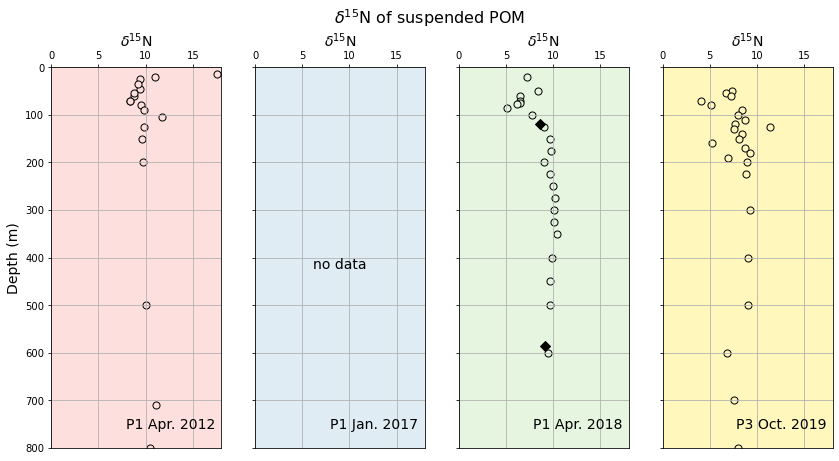

In [47]:
# Four-panel plot in depth space

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(14, 7))

fig2.suptitle('$\delta$$^{15}$N of suspended POM', fontsize=16, y = 1.0)

# d15N suspended 2012

P1_2012.plot(ax = ax2, kind='scatter', x='d15N', y='Pressure [dbar]', \
             c='#fde0dd', edgecolor = 'black', s = 50)
P1_sink2012.plot(ax = ax2, kind='scatter', x='d15N', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')
ax2.set_facecolor('#fde0dd') #2012 is pink
ax2.set_xlim([0,18])
ax2.set_ylim([0,800])
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('$\delta$$^{15}$N', fontsize = 14)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

ax2.annotate('P1 Apr. 2012', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# d15N suspended 2017 and sinking 2017

P1sus_2017.plot(ax = ax3, kind='scatter', x='d15N', y='Pressure [dbar]', \
                c='#e0ecf4', edgecolor = 'black', s = 50)
P1_2017.plot(ax = ax3, kind='scatter', x='d15N', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([0,18])
#ax3.set_ylim([0,500])
#ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('$\delta$$^{15}$N', fontsize = 14)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

ax3.annotate('P1 Jan. 2017', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax3.annotate('no data', xy=(10, 10), 
            xytext=(0.5, 0.5), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# d15N suspended 2018 and sinking 2018

P1sus_2018.plot(ax = ax4, kind='scatter', x='d15N', y='Pressure [dbar]', \
                c='#e5f5e0', edgecolor = 'black', s = 50)
P1_2018.plot(ax = ax4, kind='scatter', x='d15N', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([0,18])
#ax4.set_ylim([0,500])
#ax4.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('$\delta$$^{15}$N', fontsize = 14)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

ax4.annotate('P1 Apr. 2018', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# d15N suspended 2019

P3sus_2019.plot(ax = ax5, kind='scatter', x='d15N', y='Pressure [dbar]', \
             c='#fff7bc', edgecolor = 'black', s = 50)
ax5.set_facecolor('#fff7bc')

ax5.set_xlim([0,18])
#ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('$\delta$$^{15}$N', fontsize = 14)
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

ax5.annotate('P3 Oct. 2019', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            );

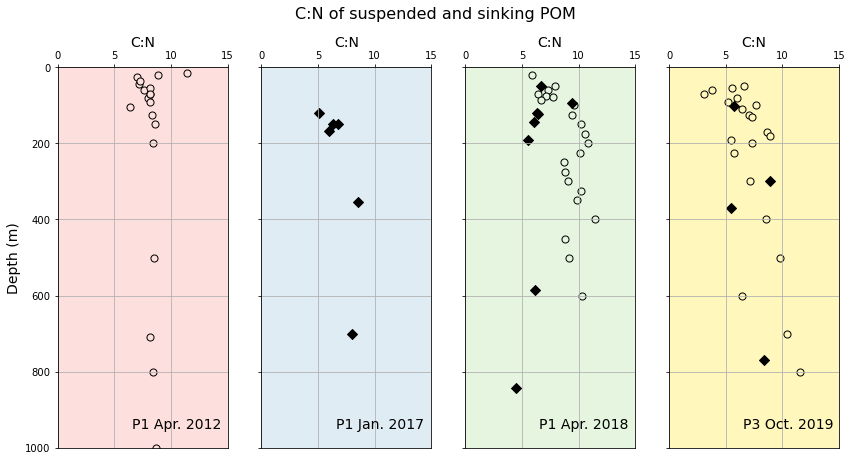

In [48]:
# Four-panel plot in depth space

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(14, 7))

fig2.suptitle('C:N of suspended and sinking POM', fontsize=16, y = 1.0)

# CN suspended 2012

P1_2012.plot(ax = ax2, kind='scatter', x='C:N', y='Pressure [dbar]', \
             c='#fde0dd', edgecolor = 'black', s = 50)
P1_sink2012.plot(ax = ax2, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')
ax2.set_facecolor('#fde0dd') #2012 is pink
ax2.set_xlim([0,15])
ax2.set_ylim([0,1000])
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('C:N', fontsize = 14)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

ax2.annotate('P1 Apr. 2012', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# CN 2017 and sinking 2017

P1sus_2017.plot(ax = ax3, kind='scatter', x='C:N', y='Pressure [dbar]', \
                c='#e0ecf4', edgecolor = 'black', s = 50)
P1_2017.plot(ax = ax3, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([0,15])
#ax3.set_ylim([0,500])
#ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('C:N', fontsize = 14)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

ax3.annotate('P1 Jan. 2017', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )


# CN 2018

P1sus_2018.plot(ax = ax4, kind='scatter', x='C:N', y='Pressure [dbar]', \
                c='#e5f5e0', edgecolor = 'black', s = 50)
P1_2018.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([0,15])
#ax4.set_ylim([0,500])
#ax4.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('C:N', fontsize = 14)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

ax4.annotate('P1 Apr. 2018', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# CN 2019

P3sus_2019.plot(ax = ax5, kind='scatter', x='C:N', y='Pressure [dbar]', \
             c='#fff7bc', edgecolor = 'black', s = 50)
P3_2019.plot(ax = ax5, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
             c='black', edgecolor = 'black', s = 50, marker = 'D')

ax5.set_facecolor('#fff7bc')

ax5.set_xlim([0,15])
#ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('C:N', fontsize = 14)
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

ax5.annotate('P3 Oct. 2019', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            );

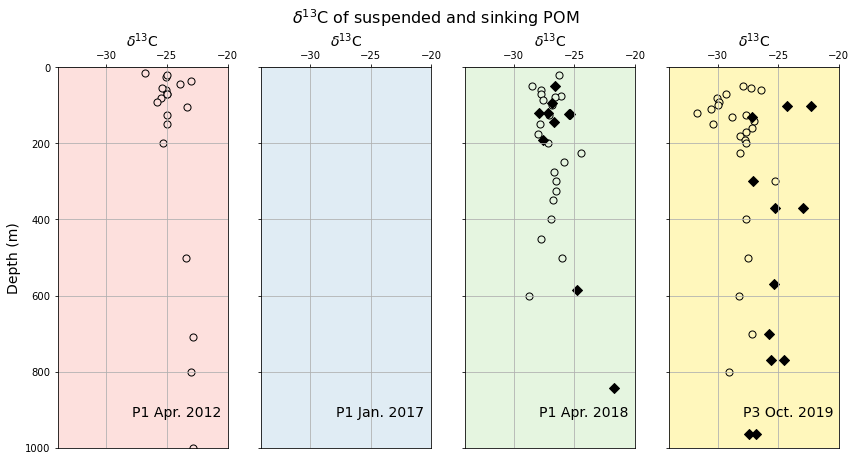

In [49]:
# Four-panel plot in depth space

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(14, 7))

fig2.suptitle('$\delta$$^{13}$C of suspended and sinking POM', fontsize=16, y = 1.0)

# del13C suspended 2012

P1_2012.plot(ax = ax2, kind='scatter', x='d13C', y='Pressure [dbar]', \
             c='#fde0dd', edgecolor = 'black', s = 50)
P1_sink2012.plot(ax = ax2, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')
ax2.set_facecolor('#fde0dd') #2012 is pink
ax2.set_xlim([-34,-20])
ax2.set_ylim([0,1000])
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('$\delta$$^{13}$C', fontsize = 14)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

ax2.annotate('P1 Apr. 2012', xy=(-20, 800), 
            xytext=(0.7, 0.11), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# del13C 2017 and sinking 2017

P1sus_2017.plot(ax = ax3, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='#e0ecf4', edgecolor = 'black', s = 50)
P1_2017.plot(ax = ax3, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([-34,-20])
#ax3.set_ylim([0,500])
#ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('$\delta$$^{13}$C', fontsize = 14)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

ax3.annotate('P1 Jan. 2017', xy=(-20, 800), 
            xytext=(0.7, 0.11), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )


# del13C 2018

P1sus_2018.plot(ax = ax4, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='#e5f5e0', edgecolor = 'black', s = 50)
P1_2018.plot(ax = ax4, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([-34,-20])
#ax4.set_ylim([0,500])
#ax4.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('$\delta$$^{13}$C', fontsize = 14)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

ax4.annotate('P1 Apr. 2018', xy=(-20, 800), 
            xytext=(0.7, 0.11), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# del13C 2019

P3sus_2019.plot(ax = ax5, kind='scatter', x='d13C', y='Pressure [dbar]', \
             c='#fff7bc', edgecolor = 'black', s = 50)
P3_2019.plot(ax = ax5, kind='scatter', x='d13C', y='Pressure [dbar]', \
             c='black', edgecolor = 'black', s = 50, marker = 'D')

ax5.set_facecolor('#fff7bc')

ax5.set_xlim([-34,-20])
#ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('$\delta$$^{13}$C', fontsize = 14)
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

ax5.annotate('P3 Oct. 2019', xy=(-20, 800), 
            xytext=(0.7, 0.11), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            );

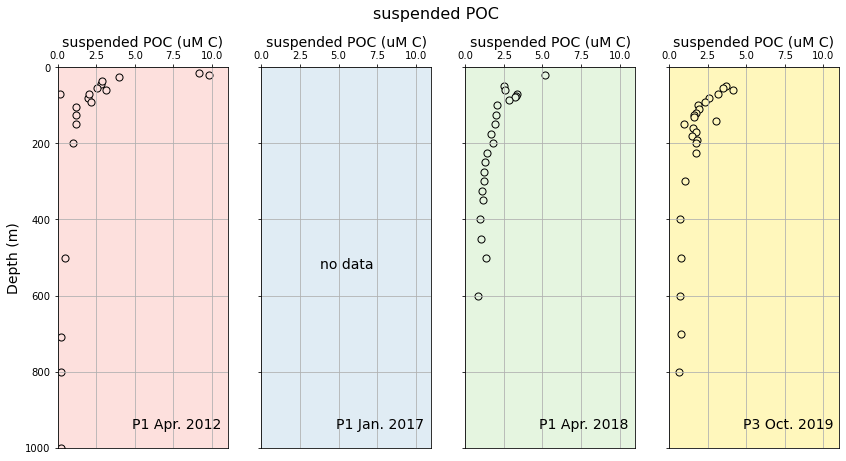

In [50]:
# Four-panel plot in depth space of suspended C in uM C

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(14, 7))

fig2.suptitle('suspended POC', fontsize=16, y = 1.0)

# POC suspended 2012

P1_2012.plot(ax = ax2, kind='scatter', x='C (umol)', y='Pressure [dbar]', \
             c='#fde0dd', edgecolor = 'black', s = 50)
ax2.set_facecolor('#fde0dd') #2012 is pink
ax2.set_xlim([0,11])
ax2.set_ylim([0,1000])
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('suspended POC (uM C)', fontsize = 14)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

ax2.annotate('P1 Apr. 2012', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# POC suspended 2017

P1sus_2017.plot(ax = ax3, kind='scatter', x='C (umol)', y='Pressure [dbar]', \
                c='#e0ecf4', edgecolor = 'black', s = 50)
#P1_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', \
                #c='black', edgecolor = 'black', s = 50, marker = 'D')

ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([0,11])
#ax3.set_ylim([0,1000])
#ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('suspended POC (uM C)', fontsize = 14)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

ax3.annotate('P1 Jan. 2017', xy=(1, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

ax3.annotate('no data', xy=(1, 1), 
            xytext=(0.5, 0.5), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# POC suspended 2018

P1sus_2018.plot(ax = ax4, kind='scatter', x='C (umol)', y='Pressure [dbar]', \
                c='#e5f5e0', edgecolor = 'black', s = 50)
#P1_2018.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
                #c='black', edgecolor = 'black', s = 50, marker = 'D')

ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([0,11])
#ax4.set_ylim([0,500])
#ax4.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('suspended POC (uM C)', fontsize = 14)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

ax4.annotate('P1 Apr. 2018', xy=(1, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# CN 2019

P3sus_2019.plot(ax = ax5, kind='scatter', x='C (umol)', y='Pressure [dbar]', \
             c='#fff7bc', edgecolor = 'black', s = 50)
#P3_2019.plot(ax = ax5, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
             #c='black', edgecolor = 'black', s = 50, marker = 'D')

ax5.set_facecolor('#fff7bc')

ax5.set_xlim([0,11])
#ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('suspended POC (uM C)', fontsize = 14)
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

ax5.annotate('P3 Oct. 2019', xy=(1, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            );

# P2

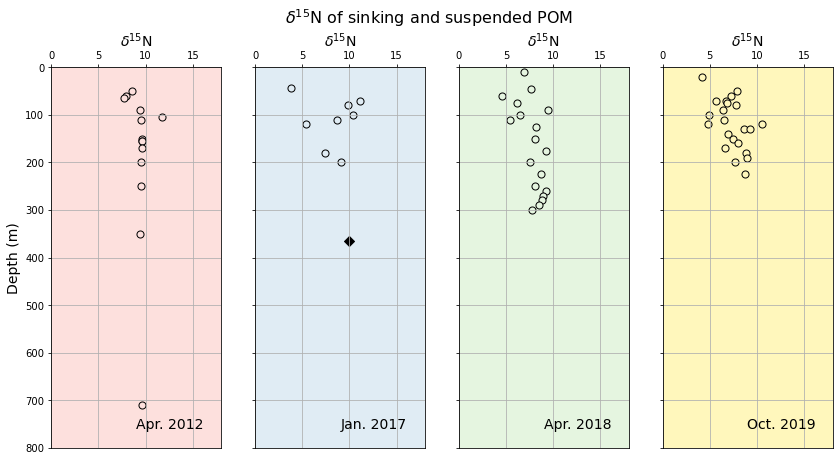

In [51]:
# Four-panel plot in depth space

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(14, 7))

fig2.suptitle('$\delta$$^{15}$N of sinking and suspended POM', fontsize=16, y = 1.0)

# d15N suspended 2012

P2_2012.plot(ax = ax2, kind='scatter', x='d15N', y='Pressure [dbar]', \
             c='#fde0dd', edgecolor = 'black', s = 50)
P2_sink2012.plot(ax = ax2, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')
ax2.set_facecolor('#fde0dd') #2012 is pink
ax2.set_xlim([0,18])
ax2.set_ylim([0,800])
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('$\delta$$^{15}$N', fontsize = 14)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

ax2.annotate('Apr. 2012', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# d15N suspended 2017 and sinking 2017

P2sus_2017.plot(ax = ax3, kind='scatter', x='d15N', y='Pressure [dbar]', \
                c='#e0ecf4', edgecolor = 'black', s = 50)
P2_2017.plot(ax = ax3, kind='scatter', x='d15N', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([0,18])
#ax3.set_ylim([0,500])
#ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('$\delta$$^{15}$N', fontsize = 14)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

ax3.annotate('Jan. 2017', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# d15N suspended 2018 and sining 2018

P2sus_2018.plot(ax = ax4, kind='scatter', x='d15N', y='Pressure [dbar]', \
                c='#e5f5e0', edgecolor = 'black', s = 50)
P2_2018.plot(ax = ax4, kind='scatter', x='d15N', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([0,18])
#ax4.set_ylim([0,500])
#ax4.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('$\delta$$^{15}$N', fontsize = 14)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

ax4.annotate('Apr. 2018', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# d15N suspended 2019

P2sus_2019.plot(ax = ax5, kind='scatter', x='d15N', y='Pressure [dbar]', \
             c='#fff7bc', edgecolor = 'black', s = 50)
ax5.set_facecolor('#fff7bc')

ax5.set_xlim([0,18])
#ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('$\delta$$^{15}$N', fontsize = 14)
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

ax5.annotate('Oct. 2019', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            );

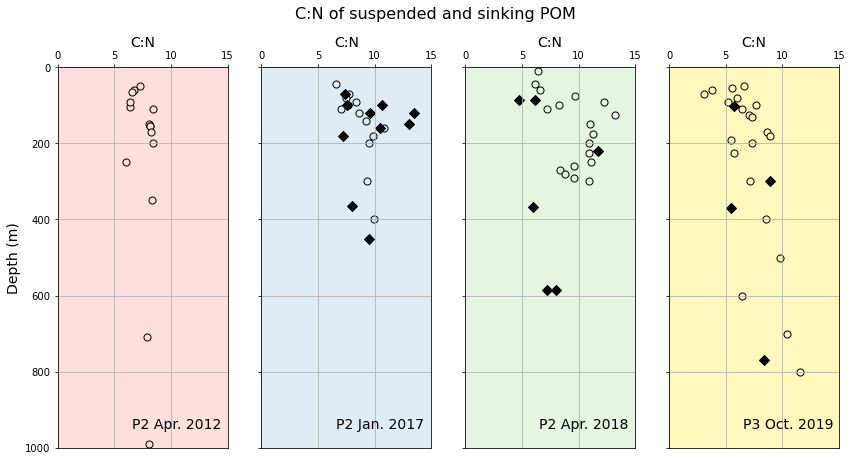

In [52]:
# Four-panel plot in depth space

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(14, 7))

fig2.suptitle('C:N of suspended and sinking POM', fontsize=16, y = 1.0)

# CN suspended 2012

P2_2012.plot(ax = ax2, kind='scatter', x='C:N', y='Pressure [dbar]', \
             c='#fde0dd', edgecolor = 'black', s = 50)
P2_sink2012.plot(ax = ax2, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')
ax2.set_facecolor('#fde0dd') #2012 is pink
ax2.set_xlim([0,15])
ax2.set_ylim([0,1000])
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('C:N', fontsize = 14)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

ax2.annotate('P2 Apr. 2012', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# CN 2017 and sinking 2017

P2sus_2017.plot(ax = ax3, kind='scatter', x='C:N', y='Pressure [dbar]', \
                c='#e0ecf4', edgecolor = 'black', s = 50)
P2_2017.plot(ax = ax3, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([0,15])
#ax3.set_ylim([0,500])
#ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('C:N', fontsize = 14)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

ax3.annotate('P2 Jan. 2017', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )


# CN 2018

P2sus_2018.plot(ax = ax4, kind='scatter', x='C:N', y='Pressure [dbar]', \
                c='#e5f5e0', edgecolor = 'black', s = 50)
P2_2018.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([0,15])
#ax4.set_ylim([0,500])
#ax4.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('C:N', fontsize = 14)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

ax4.annotate('P2 Apr. 2018', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# CN 2019

P3sus_2019.plot(ax = ax5, kind='scatter', x='C:N', y='Pressure [dbar]', \
             c='#fff7bc', edgecolor = 'black', s = 50)
P3_2019.plot(ax = ax5, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
             c='black', edgecolor = 'black', s = 50, marker = 'D')

ax5.set_facecolor('#fff7bc')

ax5.set_xlim([0,15])
#ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('C:N', fontsize = 14)
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

ax5.annotate('P3 Oct. 2019', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            );

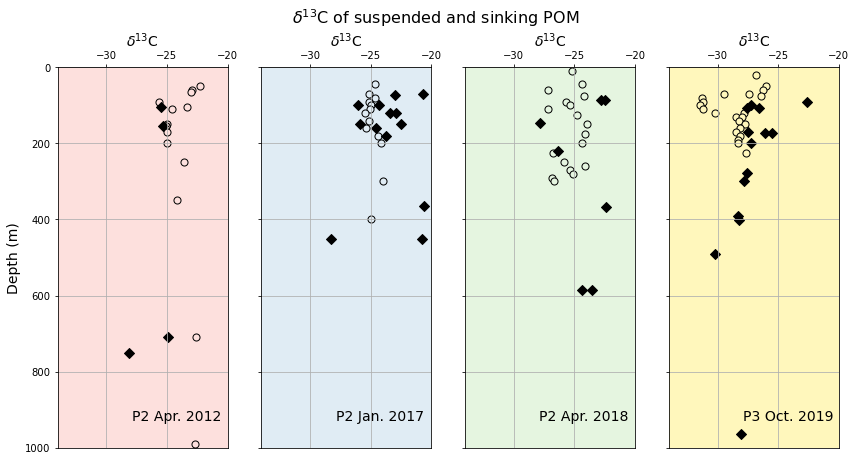

In [67]:
# Four-panel plot in depth space of del13C of suspended and sinking POM

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(14, 7))

fig2.suptitle('$\delta$$^{13}$C of suspended and sinking POM', fontsize=16, y = 1.0)

# del13C suspended 2012

P2_2012.plot(ax = ax2, kind='scatter', x='d13C', y='Pressure [dbar]', \
             c='#fde0dd', edgecolor = 'black', s = 50)
P2_sink2012.plot(ax = ax2, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')
ax2.set_facecolor('#fde0dd') #2012 is pink
ax2.set_xlim([-34,-20])
ax2.set_ylim([0,1000])
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('$\delta$$^{13}$C', fontsize = 14)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

ax2.annotate('P2 Apr. 2012', xy=(-25,700), 
            xytext=(0.7, 0.1), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# del13C 2017 and sinking 2017

P2sus_2017.plot(ax = ax3, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='#e0ecf4', edgecolor = 'black', s = 50)
P2_2017.plot(ax = ax3, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([-34,-20])
#ax3.set_ylim([0,500])
#ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('$\delta$$^{13}$C', fontsize = 14)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

ax3.annotate('P2 Jan. 2017', xy=(-25,700), 
            xytext=(0.7, 0.1), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )


# del13C 2018

P2sus_2018.plot(ax = ax4, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='#e5f5e0', edgecolor = 'black', s = 50)
P2_2018.plot(ax = ax4, kind='scatter', x='d13C', y='Pressure [dbar]', \
                c='black', edgecolor = 'black', s = 50, marker = 'D')

ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([-34,-20])
#ax4.set_ylim([0,500])
#ax4.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('$\delta$$^{13}$C', fontsize = 14)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

ax4.annotate('P2 Apr. 2018', xy=(-25,700), 
            xytext=(0.7,0.1), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# del13C 2019

P2sus_2019.plot(ax = ax5, kind='scatter', x='d13C', y='Pressure [dbar]', \
             c='#fff7bc', edgecolor = 'black', s = 50)
P2_2019.plot(ax = ax5, kind='scatter', x='d13C', y='Pressure [dbar]', \
             c='black', edgecolor = 'black', s = 50, marker = 'D')

ax5.set_facecolor('#fff7bc')

ax5.set_xlim([-34,-20])
#ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('$\delta$$^{13}$C', fontsize = 14)
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

ax5.annotate('P3 Oct. 2019', xy=(-25,700), 
            xytext=(0.7,0.1), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            );

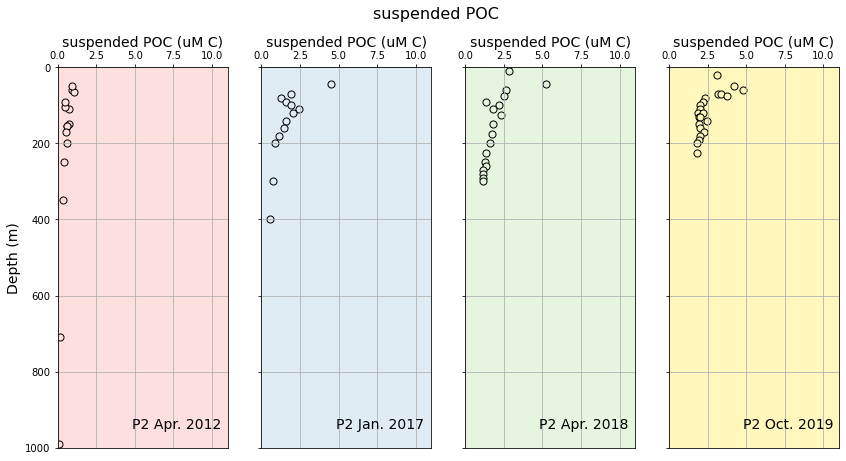

In [43]:
# Four-panel plot in depth space of suspended C 

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(14, 7))

fig2.suptitle('suspended POC', fontsize=16, y = 1.0)

# POC suspended 2012

P2_2012.plot(ax = ax2, kind='scatter', x='C (umol)', y='Pressure [dbar]', \
             c='#fde0dd', edgecolor = 'black', s = 50)
ax2.set_facecolor('#fde0dd') #2012 is pink
ax2.set_xlim([0,11])
ax2.set_ylim([0,1000])
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('suspended POC (uM C)', fontsize = 14)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

ax2.annotate('P2 Apr. 2012', xy=(10, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# POC suspended 2017

P2sus_2017.plot(ax = ax3, kind='scatter', x='C (umol)', y='Pressure [dbar]', \
                c='#e0ecf4', edgecolor = 'black', s = 50)
#P2_2017.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', \
                #c='black', edgecolor = 'black', s = 50, marker = 'D')

ax3.set_facecolor('#e0ecf4')
ax3.set_xlim([0,11])
#ax3.set_ylim([0,1000])
#ax3.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax3.set_ylabel('')
ax3.set_xlabel('suspended POC (uM C)', fontsize = 14)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

ax3.annotate('P2 Jan. 2017', xy=(1, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )


# POC suspended 2018

P2sus_2018.plot(ax = ax4, kind='scatter', x='C (umol)', y='Pressure [dbar]', \
                c='#e5f5e0', edgecolor = 'black', s = 50)
#P2_2018.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
                #c='black', edgecolor = 'black', s = 50, marker = 'D')

ax4.set_facecolor('#e5f5e0')
ax4.set_xlim([0,11])
#ax4.set_ylim([0,500])
#ax4.set_ylim(ax3.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax4.set_ylabel('')
ax4.set_xlabel('suspended POC (uM C)', fontsize = 14)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

ax4.annotate('P2 Apr. 2018', xy=(1, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            )

# CN 2019

P2sus_2019.plot(ax = ax5, kind='scatter', x='C (umol)', y='Pressure [dbar]', \
             c='#fff7bc', edgecolor = 'black', s = 50)
#P2_2019.plot(ax = ax5, kind='scatter', x='C:N organic', y='Pressure [dbar]', \
             #c='black', edgecolor = 'black', s = 50, marker = 'D')

ax5.set_facecolor('#fff7bc')

ax5.set_xlim([0,11])
#ax5.set_ylim(ax5.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax5.set_ylabel('')
ax5.set_xlabel('suspended POC (uM C)', fontsize = 14)
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

ax5.annotate('P2 Oct. 2019', xy=(1, 10), 
            xytext=(0.7, 0.08), textcoords='axes fraction',
            color='black', fontsize=14,
            horizontalalignment='center', verticalalignment='top'
            );